dataset of 1797 images of digits (similar to MNIST). Each image is made of 64 (8 × 8) pixels. This dataset is much smaller in size and complexity than MNIST, and can be handled by SVM algorithm. This dataset is built in in the scikit-learn library.

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve,auc


In [2]:
from sklearn.datasets import load_digits

digits = load_digits()

In [3]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

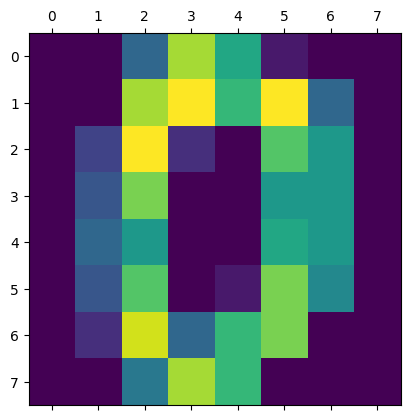

In [4]:
plt.matshow(digits.images[0])
plt.show()

In [6]:
digits_df = pd.DataFrame(digits.data)
digits_df['Class'] = digits.target

digits_df.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,Class
1545,0.0,0.0,4.0,16.0,15.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,14.0,16.0,6.0,0.0,0.0,0
669,0.0,0.0,6.0,13.0,16.0,8.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,7.0,16.0,14.0,6.0,0.0,0.0,3
1043,0.0,0.0,0.0,6.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,10.0,14.0,0.0,0.0,0.0,4
997,0.0,0.0,3.0,11.0,16.0,15.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,15.0,16.0,9.0,0.0,0.0,8
1523,0.0,0.0,3.0,13.0,16.0,15.0,6.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,16.0,7.0,0.0,0.0,0.0,7


In [7]:
def digitset(df, dig_set):
    df_copy = df.copy()
    df_copy['Class'] = df_copy.Class.apply(lambda x: 1 if x in dig_set else -1)
    return df_copy  

In [8]:
# We would like to detect if a digit is a 5 or 6, or something else
df_56 = digitset(digits_df, {5, 6})
df_56.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,Class
657,0.0,0.0,7.0,16.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,14.0,13.0,6.0,0.0,0.0,-1
862,0.0,0.0,5.0,16.0,16.0,16.0,9.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,10.0,0.0,0.0,0.0,0.0,-1
1078,0.0,2.0,0.0,8.0,9.0,0.0,0.0,0.0,0.0,13.0,...,0.0,0.0,0.0,0.0,9.0,16.0,16.0,7.0,0.0,-1
1676,0.0,1.0,8.0,13.0,15.0,5.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,6.0,13.0,16.0,15.0,6.0,0.0,-1
1321,0.0,0.0,0.0,16.0,11.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,13.0,16.0,14.0,9.0,0.0,1


In [9]:
print('Number of images of 0 digit =', len(df_56[df_56['Class']==1]),'\n')
print('Number of images of non-0 digit =', len(df_56[df_56['Class']!=1]))

Number of images of 0 digit = 363 

Number of images of non-0 digit = 1434


this classification problem is an unbalanced one!

In [10]:
X = df_56[df_56.columns[:-1]].values # Defining the features 
y = df_56['Class'].values # Defining the class
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

In [15]:
def svm_clf(X_tr, X_ts, y_tr, y_ts, ker, C, gamma='auto', r=0, deg=1):
    clf = svm.SVC(kernel=ker, gamma=gamma, C=C, coef0=r, degree=deg)
    clf.fit(X_tr, y_tr)
    y_tr_pred = clf.predict(X_tr)
    y_ts_pred = clf.predict(X_ts)
    tr_score = metrics.accuracy_score(y_tr, y_tr_pred) # Compute train accuracy 
    ts_score = metrics.accuracy_score(y_ts, y_ts_pred) # Compute test accuracy 
    tr_report = classification_report(y_tr, y_tr_pred) # Generate classification report for train data
    ts_report = classification_report(y_ts, y_ts_pred) # Generate classification report for test data
    print('Train Classification Report: \n\n', tr_report,'\n\n') 
    print('Test Classification Report: \n\n', ts_report)
    return

In [16]:
# Apply linear SVM with very low budget for margin violation
svm_clf(X_train, X_test, y_train, y_test, ker='linear', C=0.01)

Train Classification Report: 

               precision    recall  f1-score   support

          -1       0.99      1.00      1.00      1076
           1       1.00      0.97      0.98       271

    accuracy                           0.99      1347
   macro avg       0.99      0.98      0.99      1347
weighted avg       0.99      0.99      0.99      1347
 


Test Classification Report: 

               precision    recall  f1-score   support

          -1       0.99      0.99      0.99       358
           1       0.97      0.95      0.96        92

    accuracy                           0.98       450
   macro avg       0.98      0.97      0.97       450
weighted avg       0.98      0.98      0.98       450



In [17]:
# Apply polynomial SVM (deg=2, r=1) with very low budget for margin violation
svm_clf(X_train, X_test, y_train, y_test, ker='poly', C=0.01, r=1, deg=2)

Train Classification Report: 

               precision    recall  f1-score   support

          -1       1.00      1.00      1.00      1076
           1       1.00      1.00      1.00       271

    accuracy                           1.00      1347
   macro avg       1.00      1.00      1.00      1347
weighted avg       1.00      1.00      1.00      1347
 


Test Classification Report: 

               precision    recall  f1-score   support

          -1       0.99      1.00      0.99       358
           1       0.99      0.96      0.97        92

    accuracy                           0.99       450
   macro avg       0.99      0.98      0.98       450
weighted avg       0.99      0.99      0.99       450



one-vs-one approach

In [19]:
X = digits_df[digits_df.columns[:-1]].values # Defining the features y = digits_df['Class'].values # Defining the target
from sklearn.model_selection import train_test_split
# Splitting the data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

In [20]:
# Apply linear kernel with a low budget for margin violation
svm_clf(X_train, X_test, y_train, y_test, ker='linear', C=0.01)

Train Classification Report: 

               precision    recall  f1-score   support

          -1       0.99      1.00      1.00      1076
           1       1.00      0.97      0.98       271

    accuracy                           0.99      1347
   macro avg       0.99      0.98      0.99      1347
weighted avg       0.99      0.99      0.99      1347
 


Test Classification Report: 

               precision    recall  f1-score   support

          -1       0.99      0.99      0.99       358
           1       0.97      0.95      0.96        92

    accuracy                           0.98       450
   macro avg       0.98      0.97      0.97       450
weighted avg       0.98      0.98      0.98       450



In [21]:
# Apply polynomial SVM (deg=2, r=1) with very low budget for margin violation
svm_clf(X_train, X_test, y_train, y_test, ker='poly', C=1, r=1, deg=2)

Train Classification Report: 

               precision    recall  f1-score   support

          -1       1.00      1.00      1.00      1076
           1       1.00      1.00      1.00       271

    accuracy                           1.00      1347
   macro avg       1.00      1.00      1.00      1347
weighted avg       1.00      1.00      1.00      1347
 


Test Classification Report: 

               precision    recall  f1-score   support

          -1       0.99      1.00      0.99       358
           1       0.99      0.96      0.97        92

    accuracy                           0.99       450
   macro avg       0.99      0.98      0.98       450
weighted avg       0.99      0.99      0.99       450



In [22]:
# Importing 'GridSearchCV' from 'sklearn'
from sklearn.model_selection import GridSearchCV
# Specifying the hyperparameters 'C', 'gamma', and 'kernel'
param_grid = {'C': [0.01, 0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'gamma':['scale', 'auto'],
              'kernel': ['linear', 'rbf']}
# Instantiating 'GridSearchCV'
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3, n_jobs=-1) # Fitting the data
grid.fit(X_train, y_train)
print('\n Best choices for hyperparameters:\n', grid.best_params_) # Presenting best choice
grid_predictions = grid.predict(X_test) # Compute the predictions of SVM with best choice of hyperparameters

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END C=0.01, gamma=scale, kernel=linear;, score=0.970 total time=   0.0s
[CV 4/5] END C=0.01, gamma=scale, kernel=linear;, score=0.985 total time=   0.0s
[CV 3/5] END C=0.01, gamma=scale, kernel=linear;, score=0.996 total time=   0.0s
[CV 2/5] END C=0.01, gamma=scale, kernel=linear;, score=0.981 total time=   0.0s
[CV 5/5] END C=0.01, gamma=scale, kernel=linear;, score=0.981 total time=   0.0s
[CV 1/5] END .C=0.01, gamma=auto, kernel=linear;, score=0.970 total time=   0.0s
[CV 4/5] END ...C=0.01, gamma=scale, kernel=rbf;, score=0.799 total time=   0.1s
[CV 2/5] END .C=0.01, gamma=auto, kernel=linear;, score=0.981 total time=   0.0s
[CV 3/5] END .C=0.01, gamma=auto, kernel=linear;, score=0.996 total time=   0.0s
[CV 4/5] END .C=0.01, gamma=auto, kernel=linear;, score=0.985 total time=   0.0s
[CV 1/5] END ...C=0.01, gamma=scale, kernel=rbf;, score=0.800 total time=   0.1s
[CV 5/5] END .C=0.01, gamma=auto, kernel=linear

In [24]:
print('\n Test Classification Report:\n\n', classification_report(y_test, grid_predictions))


 Test Classification Report:

               precision    recall  f1-score   support

          -1       0.99      1.00      0.99       358
           1       0.99      0.96      0.97        92

    accuracy                           0.99       450
   macro avg       0.99      0.98      0.98       450
weighted avg       0.99      0.99      0.99       450



In [25]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'gamma':['scale', 'auto'],
              'kernel': ['linear', 'rbf', 'poly'],
              'degree': [2, 3],
              'coef0': [0, 1, 2]}
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3, n_jobs=-1)
grid.fit(X_train, y_train)
print('\n Best choices for hyperparameters:\n', grid.best_params_)
grid_predictions = grid.predict(X_test)
print('\n Test Classification Report:\n\n', classification_report(y_test, grid_predictions))

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV 1/5] END C=0.01, coef0=0, degree=2, gamma=scale, kernel=linear;, score=0.970 total time=   0.0s
[CV 2/5] END C=0.01, coef0=0, degree=2, gamma=scale, kernel=linear;, score=0.981 total time=   0.0s
[CV 3/5] END C=0.01, coef0=0, degree=2, gamma=scale, kernel=linear;, score=0.996 total time=   0.0s
[CV 4/5] END C=0.01, coef0=0, degree=2, gamma=scale, kernel=linear;, score=0.985 total time=   0.0s
[CV 5/5] END C=0.01, coef0=0, degree=2, gamma=scale, kernel=linear;, score=0.981 total time=   0.0s
[CV 2/5] END C=0.01, coef0=0, degree=2, gamma=scale, kernel=rbf;, score=0.796 total time=   0.1s
[CV 1/5] END C=0.01, coef0=0, degree=2, gamma=scale, kernel=rbf;, score=0.800 total time=   0.1s
[CV 1/5] END C=0.01, coef0=0, degree=2, gamma=scale, kernel=poly;, score=0.800 total time=   0.1s
[CV 3/5] END C=0.01, coef0=0, degree=2, gamma=scale, kernel=poly;, score=0.799 total time=   0.0s
[CV 2/5] END C=0.01, coef0=0, degree=2, gamma=s

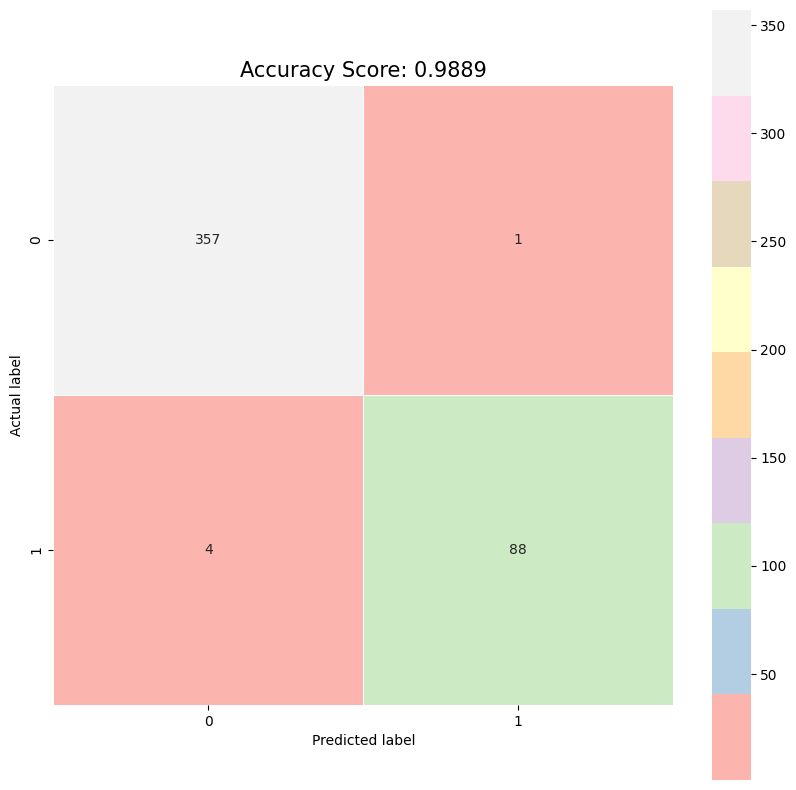

In [28]:
# Running the SVM with best choice of hyperparameters
optimal_clf = svm.SVC(kernel='poly', C=1, gamma='scale', degree=3, coef0=0)
optimal_clf.fit(X_train, y_train)
y_pred = optimal_clf.predict(X_test)
svc_c_matrix = confusion_matrix(y_test, y_pred)
score = metrics.accuracy_score(y_test, y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(svc_c_matrix, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Pastel1')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(round(score, 4)) 
plt.title(all_sample_title, size = 15)
plt.show()